The problem I would like to solve is to identify key features related to the churning credit card customers. I got the data and the idea from the Kaggle website https://www.kaggle.com/sakshigoyal7/credit-card-customers. 

## Modeling

Previously, during preprocessing, I made a dummy predictor that only assumes the result as no churning. This result will be used as the baseline for my further analysis.

Comparing to the baseline model, I will be applying K-nearest neighbors, logistic regression, and RandomForest Classification models.

### 1. Importing data

In [1]:
# First thing to do is to import modules
import numpy as np
import pandas as pd

In [2]:
# Loading the data
df = pd.read_csv('preprocessed.csv')

In [3]:
df.head().T

,0,1,2,3,4
Attrition_Flag,0.000,0.000,0.000,0.000,0.000
Customer_Age,45.000,49.000,51.000,40.000,40.000
Gender,0.000,1.000,0.000,1.000,0.000
Dependent_count,3.000,5.000,3.000,4.000,3.000
Months_on_book,39.000,44.000,36.000,34.000,21.000
Total_Relationship_Count,5.000,6.000,4.000,3.000,5.000
Months_Inactive_12_mon,1.000,1.000,1.000,4.000,1.000
Contacts_Count_12_mon,3.000,2.000,0.000,1.000,0.000
Credit_Limit,12691.000,8256.000,3418.000,3313.000,4716.000
Total_Revolving_Bal,777.000,864.000,0.000,2517.000,0.000


In [4]:
y = df['Attrition_Flag']
X = df.drop(columns=['Attrition_Flag'])

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.25, random_state=1, stratify=y)

In [7]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
# now the data is ready to run the model

(7595, 32) (2532, 32)
(7595,) (2532,)


### 2. Dummy predictor - Baseline model
Here there is no churning customer.

In [8]:
y_dum_pred = np.zeros((2532,), dtype=int)

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_dum_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2125
           1       0.00      0.00      0.00       407

    accuracy                           0.84      2532
   macro avg       0.42      0.50      0.46      2532
weighted avg       0.70      0.84      0.77      2532



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
from sklearn.metrics import confusion_matrix
pl = confusion_matrix(y_test,y_dum_pred)

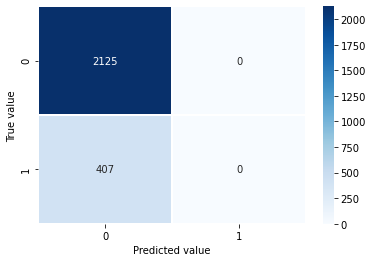

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(pl, annot=True, fmt ='d', cmap='Blues',linewidth=0.5)
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.show()

### 3. K-Nearest Neighbors

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid={'n_neighbors': np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train,y_train)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 5}
0.8743910467412771


In [13]:
y_knn_pred = knn_cv.predict(X_test)

In [14]:
print(classification_report(y_test,y_knn_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2125
           1       0.72      0.30      0.43       407

    accuracy                           0.87      2532
   macro avg       0.80      0.64      0.68      2532
weighted avg       0.85      0.87      0.85      2532



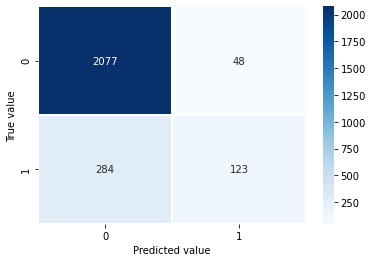

In [15]:
p2 = confusion_matrix(y_test,y_knn_pred)
sns.heatmap(p2, annot=True, fmt ='d', cmap='Blues',linewidth=0.5)
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.show()

### 4. Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
logreg = LogisticRegression()

# Hyper parameters
param_grid = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'C': [0.01, 0.1, 1, 10, 100],
             'penalty': ['l1', 'l2']}

# define grid search
logreg_cv = RandomizedSearchCV(logreg, param_distributions=param_grid, cv=5, n_jobs=-1)
logreg_cv.fit(X_train,y_train)
print(logreg_cv.best_params_, logreg_cv.best_score_)

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 1} 0.9037524687294273


In [17]:
y_lr_pred = logreg_cv.predict(X_test)

In [18]:
print(classification_report(y_test,y_lr_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2125
           1       0.78      0.58      0.66       407

    accuracy                           0.91      2532
   macro avg       0.85      0.77      0.80      2532
weighted avg       0.90      0.91      0.90      2532



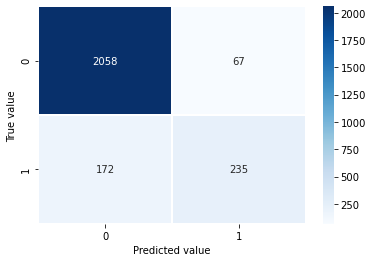

In [19]:
p3 = confusion_matrix(y_test,y_lr_pred)
sns.heatmap(p3, annot=True, fmt ='d', cmap='Blues',linewidth=0.5)
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.show()

### 5. RandomForest Classification

In [20]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [10,100,200,500,1000,2000]
RF = RandomForestClassifier(random_state=1, n_jobs=-1)
grid_params={'n_estimators':n_estimators, 'max_depth':[3,4,5,6,7,8,9,10]}
RF_cv = RandomizedSearchCV(RF,param_distributions=grid_params, cv=5, n_jobs=-1)
RF_cv.fit(X_train,y_train)
RF_cv.best_params_

{'n_estimators': 1000, 'max_depth': 10}

In [21]:
RF_a = RandomForestClassifier(random_state=1, n_jobs=-1, n_estimators=100, max_depth=9)
RF_a.fit(X_train,y_train)
y_RF_pred = RF_a.predict(X_test)

In [22]:
print(classification_report(y_test,y_RF_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2125
           1       0.91      0.68      0.78       407

    accuracy                           0.94      2532
   macro avg       0.93      0.83      0.87      2532
weighted avg       0.94      0.94      0.93      2532



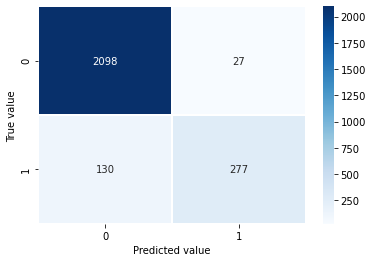

In [23]:
p4 = confusion_matrix(y_test,y_RF_pred)
sns.heatmap(p4, annot=True, fmt ='d', cmap='Blues',linewidth=0.5)
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.show()

So far, RandomForestClassification did the best with the most True positives and True negatives. 

20


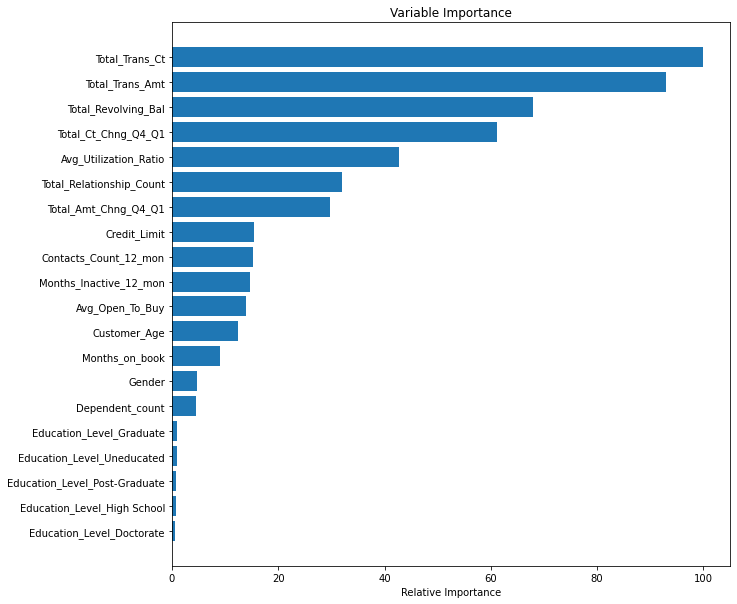

In [26]:
feature_importance = RF_a.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:20]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Several important features in determining churning customers were count and amount of transactions using the credit card. This is an obvious conclusion because for customers not using the credit card much, they are more likely to stop the service. 

One feature that stood out was __Total_Relationship_Count__ which is the number of product held by the customer. It seems like this can be a good indication to see how loyal the customer is to the credit card company. 

Another interesting finding was the minimal influence of the socieoeconomic status of the customer. The education level, gender, age, income category, and marital status didn't have much impact on churning prediction which was interesting to note. 